The squid game is currently one of the most trending shows on Netflix. It is so much trending that people who have never watched any web series before are also watching it. One of the reasons behind this is the reviews and opinions of viewers on social media.

The dataset that I am using for the task of Squid Game sentiment analysis is downloaded from Kaggle, which was initially collected from Twitter while people were actively sharing their opinions about Squid Game. Let’s start the task of Squid Game sentiment analysis by importing the necessary Python libraries and the dataset:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

data = pd.read_csv(r"C:\Users\SHREE\Downloads\Python CODES\Squid Game Sentiment Analysis using Python\squid_game.csv")
print(data.head())

                    user_name  user_location  \
0   the _ûndër-ratèd niggáh👊🏾            NaN   
1  Best uncle on planet earth            NaN   
2                      marcie            NaN   
3                    YoMo.Mdp  Any pronouns    
4             Laura Reactions         France   

                                    user_description  \
0  @ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...   
1                                                NaN   
2  animal crossing. chicken nuggets. baby yoda. s...   
3  Where the heck is the karma\nI'm going on my s...   
4  I talk and I make reactions videos about shows...   

                user_created  user_followers  user_friends  user_favourites  \
0  2019-09-06 19:24:57+00:00             581          1035             8922   
1  2013-05-08 19:35:26+00:00             741           730             8432   
2  2009-02-21 10:31:30+00:00             562          1197            62732   
3  2021-02-14 13:21:22+00:00               3           277

In first impressions of this dataset, I noticed null values in the “user_location” column that seem to not affect the sentiment analysis task. So I will drop this column:

In [2]:
data = data.drop(columns="user_location", axis=1)

Now let’s have a look at whether other columns contain any null values or not:

In [3]:
print(data.isnull().sum())

user_name              4
user_description    5211
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
source                 0
is_retweet             0
dtype: int64


The “user_description” column also contains null values, which will also not affect the sentiment analysis task. So I’m going to delete this column as well:

In [4]:
data = data.drop(columns="user_description", axis=1)
data = data.dropna()

The “text” column in the dataset contains the opinions of the users of Twitter about the squid game, as these are social media opinions, so this column needs to be prepared before any analysis. So let’s prepare this column for the task of sentiment analysis:

In [5]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHREE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Now let’s take a look at the most used words in the Squid Game opinions using a word cloud. A word cloud is a data visualization tool that displays the most used words in a larger size. Here is how you can visualize the word cloud of the text column:

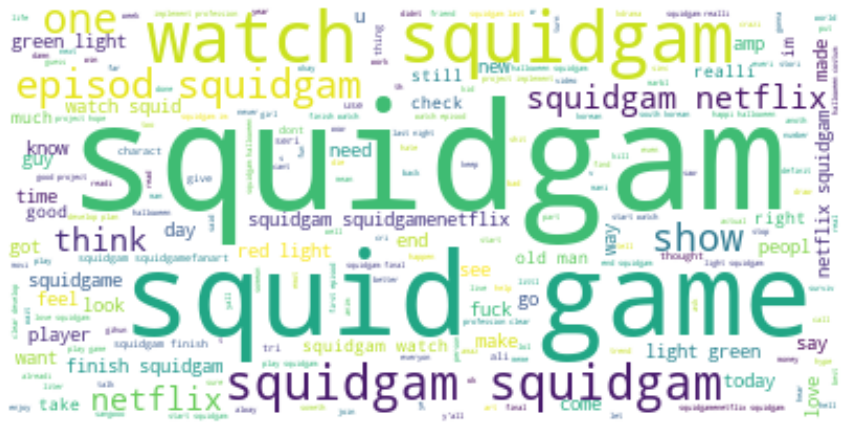

In [6]:
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now let’s move to the task of Squid Game sentiment analysis. Here I will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the text column:

In [7]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["text"]]
data = data[["text", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SHREE\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                text  Positive  Negative  \
0  life hit time poverti strike yougong yoo  let ...     0.173     0.108   
1                    marbl episod squidgam  ruin 😭😭😭     0.000     0.487   
2                                      squidgam time     0.000     0.000   
3  blood  slideim join squidgam thing im alreadi ...     0.142     0.277   
4  two first game player kill mask guy  bloodi ni...     0.000     0.461   

   Neutral  
0    0.719  
1    0.513  
2    1.000  
3    0.581  
4    0.539  


Now let’s calculate how most people think about the Squid Game:

In [8]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


So most of the opinions of the users are Neutral, now let’s have a look at the total of each sentiment score before making any conclusion:

In [9]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  10604.55899999976
Negative:  5171.334000000031
Neutral:  64233.11800000302


The total of negatives is much lower than that of Positive, so we can say that most of the opinions on the Squid Game are positive.

## Summary

The Squid Game is currently one of the most trending shows on Netflix. One of the reasons behind this is the reviews and opinions of viewers on social media.